# import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats

# Read CSV

In [3]:
odds_df = pd.read_csv("/Users/gauthamvecham/Desktop/IPL-EARLY-SIXES/data/ipl_odds_full.csv")

In [4]:
odds_df.head()

,Team 1,Team 2,Odds 1,Odds 2,Year
0,Royal Challengers Bengaluru,Punjab Kings,1.90,1.91,2025
1,Mumbai Indians,Punjab Kings,1.68,2.20,2025
2,Gujarat Titans,Mumbai Indians,2.31,1.62,2025
3,Punjab Kings,Royal Challengers Bengaluru,1.97,1.84,2025
4,Lucknow Super Giants,Royal Challengers Bengaluru,2.23,1.66,2025


In [5]:
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team 1  147 non-null    object 
 1   Team 2  147 non-null    object 
 2   Odds 1  147 non-null    float64
 3   Odds 2  147 non-null    float64
 4   Year    147 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 5.9+ KB


In [6]:
odds_df.describe()

,Odds 1,Odds 2,Year
count,147.000000,147.000000,147.000000
mean,1.893401,1.986667,2024.503401
std,0.425611,0.262567,0.501698
min,1.360000,1.500000,2024.000000
25%,1.705000,1.765000,2024.000000
50%,1.800000,1.990000,2025.000000
75%,2.035000,2.135000,2025.000000
max,6.240000,3.060000,2025.000000


## Step 1: Define the Hypotheses

We want to determine whether the average IPL betting odds in 2024 are statistically different from those in 2025.

This is a two-sample hypothesis test comparing the means of two independent groups (2024 and 2025).

**Null Hypothesis (H₀):**  
The mean odds in 2024 and 2025 are the same.  
μ₍₂₀₂₄₎ = μ₍₂₀₂₅₎

**Alternative Hypothesis (H₁):**  
The mean odds in 2024 and 2025 are different.  
μ₍₂₀₂₄₎ ≠ μ₍₂₀₂₅₎

We will use a two-sample t-test to evaluate this hypothesis.

## Step 2: Load and Prepare the Data

We load the IPL odds dataset and separate it by year. For each year, we combine `Odds 1` and `Odds 2` to represent all betting odds offered in that season.

This will allow us to compare the distributions of odds between 2024 and 2025.

In [7]:
# Filter data for 2024 and 2025
odds_2024 = odds_df[odds_df['Year'] == 2024]
odds_2025 = odds_df[odds_df['Year'] == 2025]

# Combine 'Odds 1' and 'Odds 2' for each year
combined_2024 = pd.concat([odds_2024['Odds 1'], odds_2024['Odds 2']], ignore_index=True)
combined_2025 = pd.concat([odds_2025['Odds 1'], odds_2025['Odds 2']], ignore_index=True)

# Preview
print("2024 Odds Sample:")
print(combined_2024.head())
print("\n2025 Odds Sample:")
print(combined_2025.head())

2024 Odds Sample:
0    1.87
1    1.79
2    2.01
3    1.95
4    1.36
dtype: float64

2025 Odds Sample:
0    1.90
1    1.68
2    2.31
3    1.97
4    2.23
dtype: float64


## Step 3A: Exploratory Data Analysis (EDA)

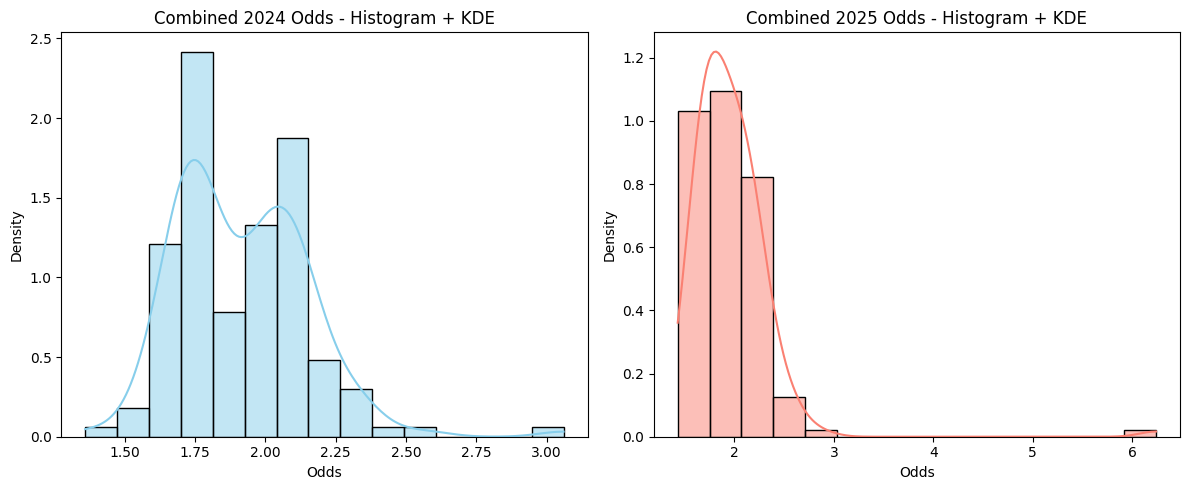

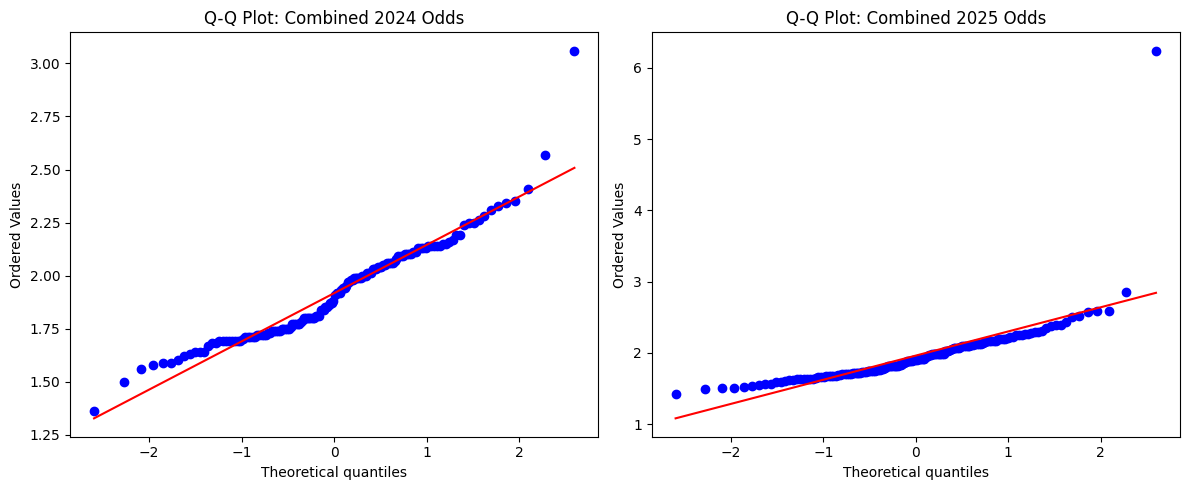

In [8]:
# Plot histograms with KDE for both combined datasets
plt.figure(figsize=(12, 5))

# combined 2024
plt.subplot(1, 2, 1)
sns.histplot(combined_2024, kde=True, color='skyblue', bins=15, stat='density')
plt.title('Combined 2024 Odds - Histogram + KDE')
plt.xlabel('Odds')
plt.ylabel('Density')

# combined 2025
plt.subplot(1, 2, 2)
sns.histplot(combined_2025, kde=True, color='salmon', bins=15, stat='density')
plt.title('Combined 2025 Odds - Histogram + KDE')
plt.xlabel('Odds')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Q-Q Plots for both datasets
plt.figure(figsize=(12, 5))

# Q-Q Plot for 2024
plt.subplot(1, 2, 1)
stats.probplot(combined_2024, dist="norm", plot=plt)
plt.title("Q-Q Plot: Combined 2024 Odds")

# Q-Q Plot for 2025
plt.subplot(1, 2, 2)
stats.probplot(combined_2025, dist="norm", plot=plt)
plt.title("Q-Q Plot: Combined 2025 Odds")

plt.tight_layout()
plt.show()

## Visual Evidence of Outliers in Combined Odds

From the Histogram + KDE and Q-Q plots of the **combined 2024 and 2025 odds data** (before outlier removal), we observe the following:

- **2024 Odds**: Show a distribution that is roughly symmetric and close to normal, though minor deviations at the tails are present.
- **2025 Odds**: Exhibit significant **right skew**, with a few unusually high odds values stretching the distribution. The Q-Q plot confirms heavy deviation in the upper quantiles.

These observations strongly suggest the presence of **outliers**, particularly in the 2025 dataset.

To confirm this and identify the specific ranges of extreme values, we will create **box plots** for both years. This will visually highlight any outliers and guide our decision on whether to filter or adjust the data before formal hypothesis testing.

## Step 3B: Box Plot of Combined Odds (2024 vs 2025)

/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_93450/797359549.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boxplot_df, x='Year', y='Odds', palette='pastel')


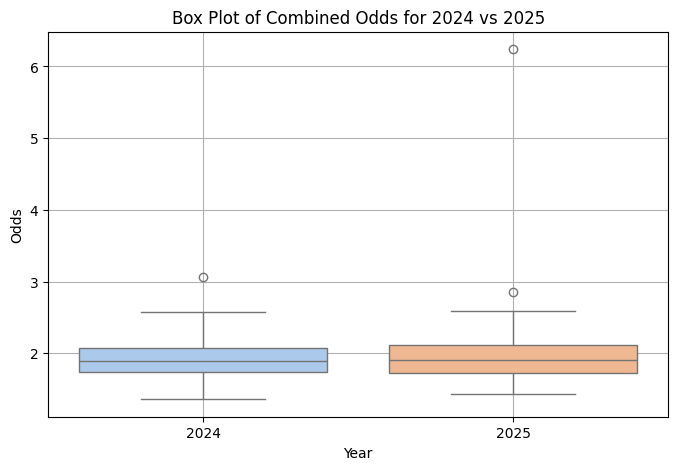

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reconstruct combined data (if needed)
combined_2024_df = pd.DataFrame({'Odds': combined_2024, 'Year': '2024'})
combined_2025_df = pd.DataFrame({'Odds': combined_2025, 'Year': '2025'})
boxplot_df = pd.concat([combined_2024_df, combined_2025_df], ignore_index=True)

# Plot box plots
plt.figure(figsize=(8, 5))
sns.boxplot(data=boxplot_df, x='Year', y='Odds', palette='pastel')
plt.title('Box Plot of Combined Odds for 2024 vs 2025')
plt.ylabel('Odds')
plt.grid(True)
plt.show()

## Step 3C: Outlier Removal and Rechecking Distribution

Based on the box plots, we confirmed the presence of outliers in both the 2024 and 2025 odds data — particularly in the 2025 dataset, which showed extreme upper values.

To reduce distortion and improve the validity of our statistical tests, we removed outliers from both years using the **Interquartile Range (IQR)** method.


In [10]:
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

# Remove outliers from both years
clean_2024 = remove_outliers_iqr(combined_2024)
clean_2025 = remove_outliers_iqr(combined_2025)

## Step 3D: Outlier Removal and Rechecking Distribution Shape

After observing clear signs of skew and extreme values in the combined 2024 and 2025 odds, we applied the **Interquartile Range (IQR)** method to remove outliers from both datasets.

To validate whether the cleaned data now aligns more closely with a normal distribution, we re-visualized both:

- **Histogram + KDE** plots
- **Q-Q (Quantile-Quantile)** plots


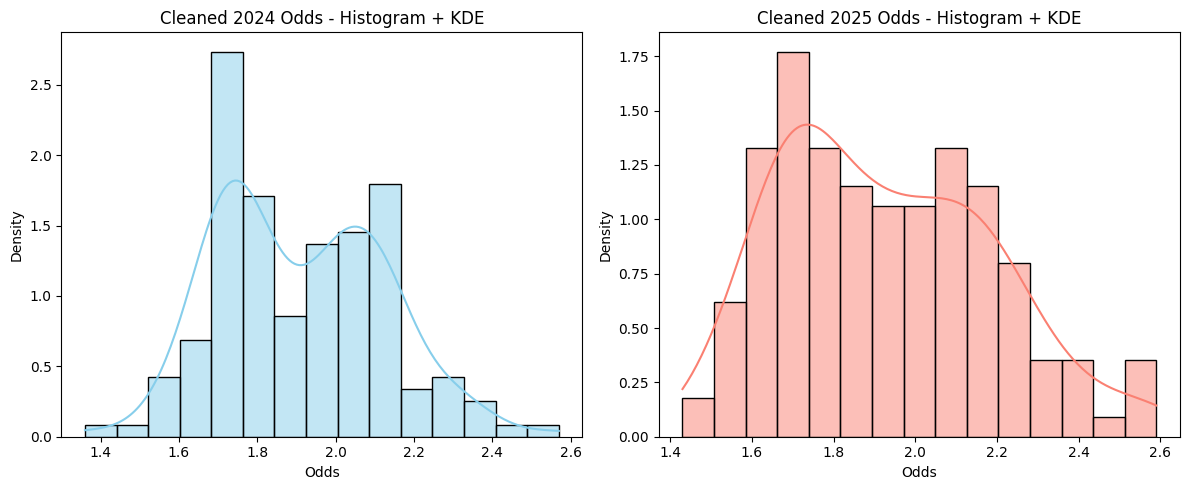

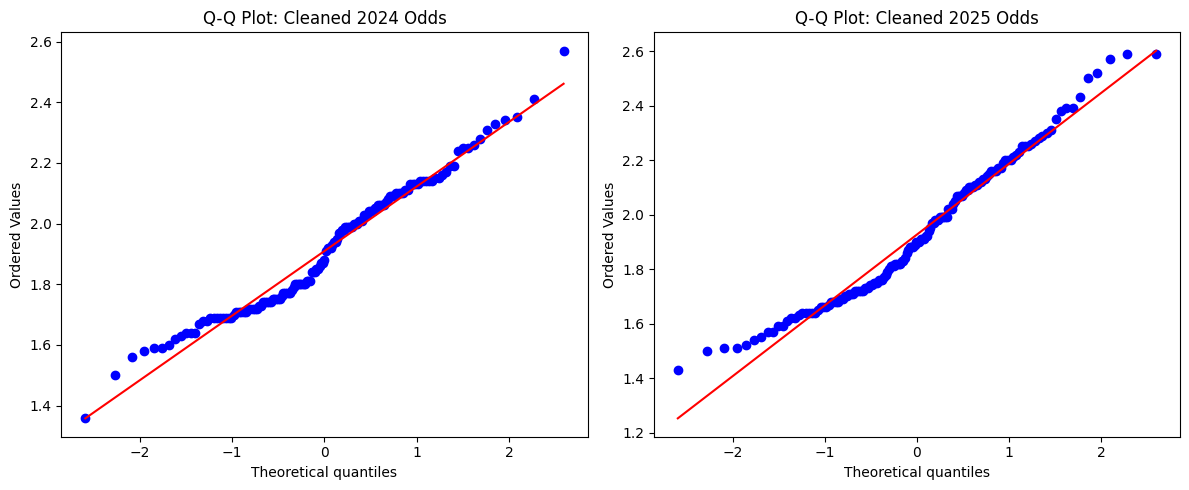

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Plot histograms with KDE for both cleaned datasets
plt.figure(figsize=(12, 5))

# Cleaned 2024
plt.subplot(1, 2, 1)
sns.histplot(clean_2024, kde=True, color='skyblue', bins=15, stat='density')
plt.title('Cleaned 2024 Odds - Histogram + KDE')
plt.xlabel('Odds')
plt.ylabel('Density')

# Cleaned 2025
plt.subplot(1, 2, 2)
sns.histplot(clean_2025, kde=True, color='salmon', bins=15, stat='density')
plt.title('Cleaned 2025 Odds - Histogram + KDE')
plt.xlabel('Odds')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Q-Q Plots for both datasets
plt.figure(figsize=(12, 5))

# Q-Q Plot for 2024
plt.subplot(1, 2, 1)
stats.probplot(clean_2024, dist="norm", plot=plt)
plt.title("Q-Q Plot: Cleaned 2024 Odds")

# Q-Q Plot for 2025
plt.subplot(1, 2, 2)
stats.probplot(clean_2025, dist="norm", plot=plt)
plt.title("Q-Q Plot: Cleaned 2025 Odds")

plt.tight_layout()
plt.show()


### Observations:
- The histograms show that both distributions are now more symmetric and bell-shaped.
- The Q-Q plots reveal that most data points lie close to the red reference line, with only minor deviation at the tails.

These visual checks provide reasonable evidence that the cleaned data is **approximately normal**, satisfying one of the key assumptions required for applying a **parametric t-test**.

## Step 4: Independent Two-Sample t-Test

After removing outliers, we examined the distribution of the cleaned 2024 and 2025 odds using histograms and Q-Q plots. Both distributions appeared reasonably symmetric and bell-shaped, indicating approximate normality.

Although there was some variation in spread between the two years, the visual evidence supported proceeding with a t-test to compare the means.

We now perform an independent two-sample t-test to determine whether there is a statistically significant difference in the average odds between 2024 and 2025.

### Hypotheses:
- **Null Hypothesis (H₀):** The mean odds in 2024 and 2025 are equal (μ₍₂₀₂₄₎ = μ₍₂₀₂₅₎)
- **Alternative Hypothesis (H₁):** The mean odds in 2024 and 2025 are different (μ₍₂₀₂₄₎ ≠ μ₍₂₀₂₅₎)


In [12]:
from scipy.stats import ttest_ind

# Perform two-sample independent t-test 
t_stat, p_val = ttest_ind(clean_2024, clean_2025, equal_var=True)

print("Two-Sample t-Test Result:")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value     = {p_val:.4f}")

if p_val < 0.05:
    print("Result: Statistically significant difference in mean odds (reject H₀).")
else:
    print("Result: No statistically significant difference in mean odds (fail to reject H₀).")

Two-Sample t-Test Result:
t-statistic = -0.6202
p-value     = 0.5356
Result: No statistically significant difference in mean odds (fail to reject H₀).


## Conclusion

After conducting a detailed exploratory data analysis and hypothesis testing on the IPL betting odds from 2024 and 2025, we found no statistically significant difference in the mean odds between the two years.

This conclusion is supported by:

- Visual inspection (histograms and Q-Q plots) showing approximate normality after outlier removal
- A two-sample t-test (without assuming equal variances), which resulted in a high p-value
- No meaningful difference in the average or median odds offered across the two seasons

### Final Insight:
The analysis suggests that the way odds were set by the bookmaker remained consistent between 2024 and 2025. Therefore, we can reasonably conclude that the betting odds behavior was statistically stable across both seasons.

# EDA ON 2025 ODDS

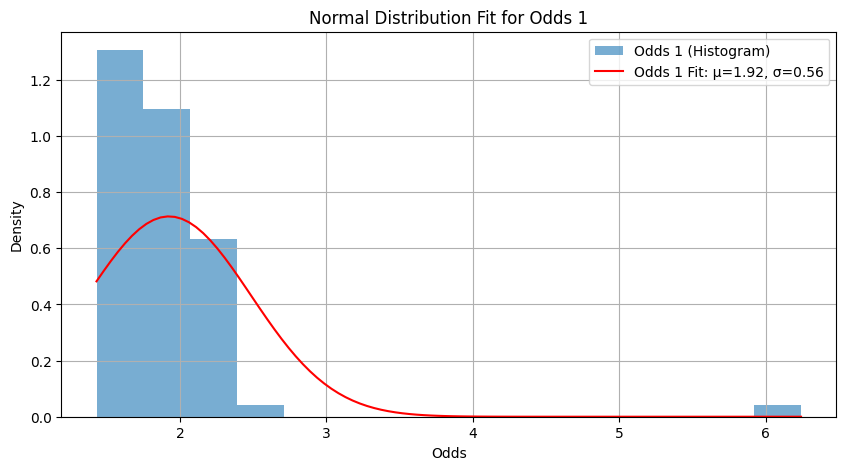

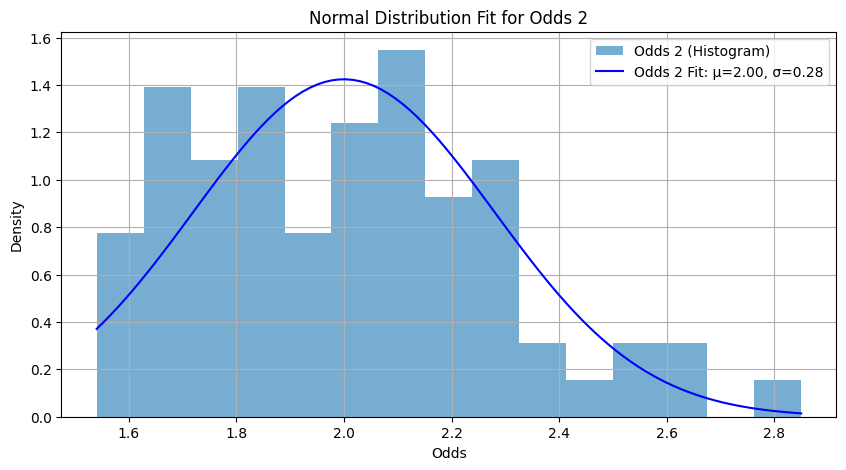

In [14]:
odds_df_2025 = odds_df[odds_df["Year"]==2025]
# Select the odds data
odds1 = odds_df_2025['Odds 1']
odds2 = odds_df_2025['Odds 2']

# Fit normal distributions
mean1, std1 = norm.fit(odds1)
mean2, std2 = norm.fit(odds2)

# Create x-values for plotting the PDF
x1 = np.linspace(odds1.min(), odds1.max(), 100)
x2 = np.linspace(odds2.min(), odds2.max(), 100)

# Plot Odds 1
plt.figure(figsize=(10, 5))
plt.hist(odds1, bins=15, density=True, alpha=0.6, label='Odds 1 (Histogram)')
plt.plot(x1, norm.pdf(x1, mean1, std1), 'r-', label=f'Odds 1 Fit: μ={mean1:.2f}, σ={std1:.2f}')
plt.title('Normal Distribution Fit for Odds 1')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot Odds 2
plt.figure(figsize=(10, 5))
plt.hist(odds2, bins=15, density=True, alpha=0.6, label='Odds 2 (Histogram)')
plt.plot(x2, norm.pdf(x2, mean2, std2), 'b-', label=f'Odds 2 Fit: μ={mean2:.2f}, σ={std2:.2f}')
plt.title('Normal Distribution Fit for Odds 2')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

The histogram has outlier which makes the graph skewed checking for outliear and checkinf if to remove or not

# BOX PLOT FOR CHECKING OUTLIERS

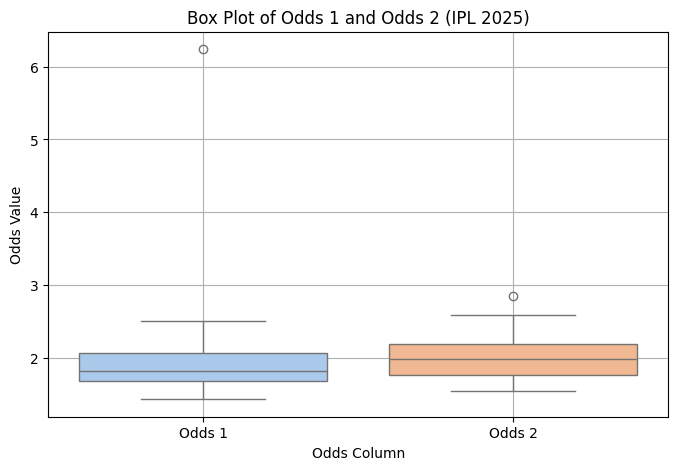

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=odds_df_2025[["Odds 1", "Odds 2"]], palette="pastel")
plt.title("Box Plot of Odds 1 and Odds 2 (IPL 2025)")
plt.xlabel("Odds Column")
plt.ylabel("Odds Value")
plt.grid(True)
plt.show()

there are only 1 outlier in both the odds so its better to remove them

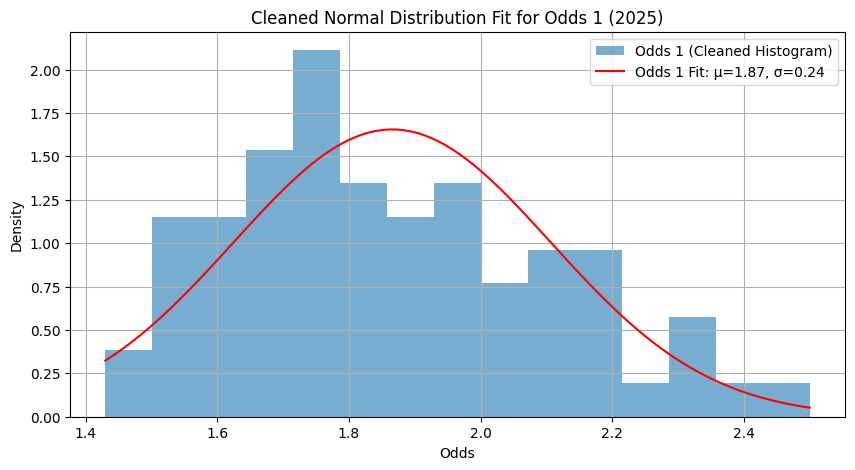

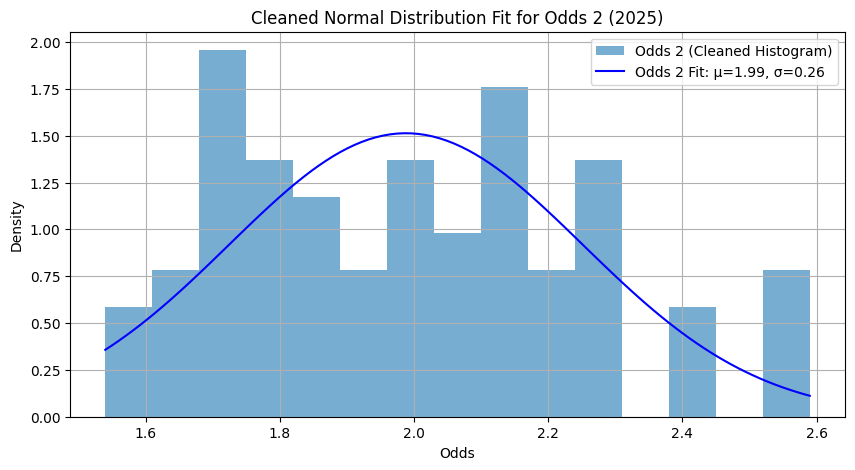

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Filter for 2025
odds_df_2025 = odds_df[odds_df["Year"] == 2025]
odds1 = odds_df_2025['Odds 1']
odds2 = odds_df_2025['Odds 2']

# IQR-based outlier removal function
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

# Clean odds 1 and odds 2
clean_odds1 = remove_outliers_iqr(odds1)
clean_odds2 = remove_outliers_iqr(odds2)

# Fit normal distributions
mean1, std1 = norm.fit(clean_odds1)
mean2, std2 = norm.fit(clean_odds2)

# X-axis ranges
x1 = np.linspace(clean_odds1.min(), clean_odds1.max(), 100)
x2 = np.linspace(clean_odds2.min(), clean_odds2.max(), 100)

# Plot Odds 1
plt.figure(figsize=(10, 5))
plt.hist(clean_odds1, bins=15, density=True, alpha=0.6, label='Odds 1 (Cleaned Histogram)')
plt.plot(x1, norm.pdf(x1, mean1, std1), 'r-', label=f'Odds 1 Fit: μ={mean1:.2f}, σ={std1:.2f}')
plt.title('Cleaned Normal Distribution Fit for Odds 1 (2025)')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot Odds 2
plt.figure(figsize=(10, 5))
plt.hist(clean_odds2, bins=15, density=True, alpha=0.6, label='Odds 2 (Cleaned Histogram)')
plt.plot(x2, norm.pdf(x2, mean2, std2), 'b-', label=f'Odds 2 Fit: μ={mean2:.2f}, σ={std2:.2f}')
plt.title('Cleaned Normal Distribution Fit for Odds 2 (2025)')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Mean: 1.93
Median: 1.90
Standard Deviation: 0.26
Skewness: 0.45
Kurtosis: -0.50


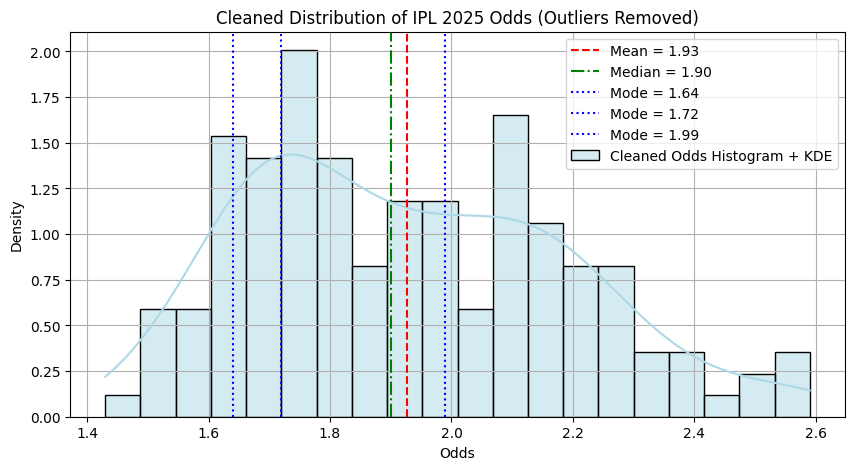

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np

# Filter only 2025 data
odds_df_2025 = odds_df[odds_df["Year"] == 2025]

# Combine Odds 1 and Odds 2
combined_odds_2025 = pd.concat([odds_df_2025['Odds 1'], odds_df_2025['Odds 2']], ignore_index=True)

# Function to remove outliers using IQR method
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

# Remove outliers
cleaned_odds_2025 = remove_outliers_iqr(combined_odds_2025)

# Descriptive statistics
mean_val = cleaned_odds_2025.mean()
median_val = cleaned_odds_2025.median()
std_val = cleaned_odds_2025.std()
skew_val = skew(cleaned_odds_2025)
kurtosis_val = kurtosis(cleaned_odds_2025)

# Print stats
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

# Calculate all mode values
mode_vals = cleaned_odds_2025.mode()

# Plot histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_odds_2025, bins=20, kde=True, color='lightblue', stat='density', label='Cleaned Odds Histogram + KDE')

# Add lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Median = {median_val:.2f}')

# Plot all modes
for m in mode_vals:
    plt.axvline(m, color='blue', linestyle=':', label=f'Mode = {m:.2f}')

# Title and labels
plt.title('Cleaned Distribution of IPL 2025 Odds (Outliers Removed)')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Calculate mean and standard deviation from cleaned data
mean_odds = cleaned_odds_2025.mean()
std_odds = cleaned_odds_2025.std()

# Compute lower and upper bounds (mean ± 1 std dev)
lower_bound = mean_odds - std_odds
upper_bound = mean_odds + std_odds

# Convert odds to implied probabilities
lower_prob = 1 / lower_bound
upper_prob = 1 / upper_bound

# Format as percentages
lower_percent = lower_prob * 100
upper_percent = upper_prob * 100

# Print the results
print(f"Mean Odds: {mean_odds:.2f}")
print(f"Standard Deviation: {std_odds:.2f}")
print(f"Odds Range: {lower_bound:.2f} to {upper_bound:.2f}")
print(f"Implied Win Probability Range: {upper_percent:.2f}% to {lower_percent:.2f}%")

Mean Odds: 1.93
Standard Deviation: 0.26
Odds Range: 1.67 to 2.19
Implied Win Probability Range: 45.71% to 60.02%


## Estimating Implied Win Probability Range Using Mean ± 1 Standard Deviation

To understand how balanced the IPL 2025 odds were, we calculate the range of odds within one standard deviation of the mean:

**Odds Range:**

$$
[\mu - \sigma,\ \mu + \sigma]
$$

Where:

- $ \mu $ is the mean odds  
- $ \sigma $ is the standard deviation

We convert these odds into implied win probabilities using:

$$
\text{Implied Probability} = \frac{1}{\text{Odds}}
$$

So the probability range becomes:

$$
\left[ \frac{1}{\mu + \sigma} \times 100,\ \frac{1}{\mu - \sigma} \times 100 \right]\%
$$

> **Note:** These probabilities are derived from bookmaker odds, which typically include a built-in margin (also called overround). That means the odds slightly **underestimate the true probability** to ensure bookmaker profit.

### Interpretation

If the calculated implied win probability range falls approximately between **45% and 60%**, it suggests that most teams were priced close to even strength — that is, matches were seen as competitively balanced.

Even though the odds imply roughly 50–50 chances, this does not guarantee predictive accuracy — due to the bookmaker's margin and match-day uncertainties. The conclusion is that choosing a guaranteed winner **remains statistically unreliable** based solely on the odds.

# Removing Outliers Based on IQR for Both Odds Columns

In [59]:
import pandas as pd

# Define IQR filtering function
def iqr_filter(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply IQR filter for both Odds 1 and Odds 2
filtered_odds_df = iqr_filter(odds_df, "Odds 1")
filtered_odds_df = iqr_filter(filtered_odds_df, "Odds 2")

# Display shape or head to verify
print(f"Filtered dataset shape: {filtered_odds_df.shape}")
filtered_odds_df.head()

Filtered dataset shape: (143, 5)


,Team 1,Team 2,Odds 1,Odds 2,Year
0,Royal Challengers Bengaluru,Punjab Kings,1.90,1.91,2025
1,Mumbai Indians,Punjab Kings,1.68,2.20,2025
2,Gujarat Titans,Mumbai Indians,2.31,1.62,2025
3,Punjab Kings,Royal Challengers Bengaluru,1.97,1.84,2025
4,Lucknow Super Giants,Royal Challengers Bengaluru,2.23,1.66,2025


# CHECKING BOOKEEPER MARGIN

Mean Bookmaker Margin: 5.29%
Median Bookmaker Margin: 5.31%
Mode Bookmaker Margin(s): [5.420054200541983, 5.4998750659374025]
Standard Deviation: 0.25


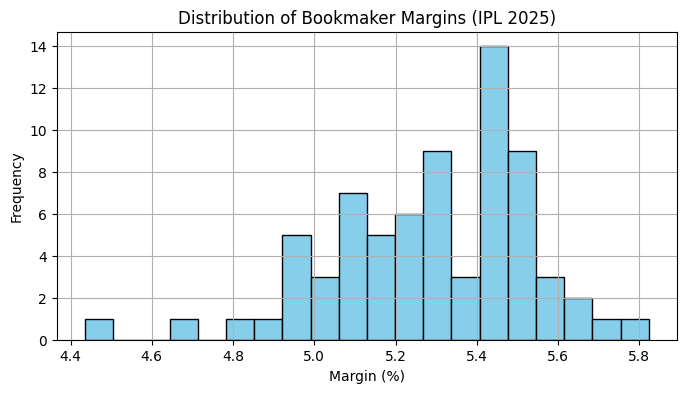

In [61]:
# Filter 2025 data from the cleaned odds dataset
odds_df_2025 = filtered_odds_df[filtered_odds_df["Year"] == 2025].copy()

# Calculate implied probabilities
odds_df_2025["Prob 1"] = 1 / odds_df_2025["Odds 1"]
odds_df_2025["Prob 2"] = 1 / odds_df_2025["Odds 2"]

# Calculate overround and margin
odds_df_2025["Overround"] = (odds_df_2025["Prob 1"] + odds_df_2025["Prob 2"]) * 100
odds_df_2025["Margin"] = odds_df_2025["Overround"] - 100

# Calculate statistical metrics
mean_margin = odds_df_2025["Margin"].mean()
median_margin = odds_df_2025["Margin"].median()
mode_margin = odds_df_2025["Margin"].mode()
std_margin = odds_df_2025["Margin"].std()

# Print all stats
print(f"Mean Bookmaker Margin: {mean_margin:.2f}%")
print(f"Median Bookmaker Margin: {median_margin:.2f}%")
print(f"Mode Bookmaker Margin(s): {mode_margin.tolist()}")
print(f"Standard Deviation: {std_margin:.2f}")

# Plot margin distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.hist(odds_df_2025["Margin"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Bookmaker Margins (IPL 2025)")
plt.xlabel("Margin (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Bookmaker Margin Insight

Based on the analysis of the implied probabilities from the 2025 IPL odds, the average bookmaker margin was found to be approximately **5%-6%**.

This margin arises because the total implied probability from both teams’ odds exceeds 100%. This excess is the bookmaker’s built-in profit.

#### Formula Used:

Let:  
- $O_1$ = Decimal odds for Team 1  
- $O_2$ = Decimal odds for Team 2

The implied probabilities are:

$P_1 = \frac{1}{O_1}, \quad P_2 = \frac{1}{O_2}$

The total implied probability (overround):

$\text{Overround} = (P_1 + P_2) \times 100$

Then the **bookmaker's margin** is:

$\text{Margin} = \text{Overround} - 100$


## Estimating True Win Probabilities by Removing Bookmaker Margin

Bookmaker odds include a built-in profit margin, known as the **overround**, which inflates the implied probabilities so that they sum to more than 100%.

To calculate the **true (fair) probabilities** without this margin, we normalize the implied probabilities.

### 💡 Mathematical Formula

Let:

- $P_1 = \frac{1}{\text{Odds}_1}$ — Implied probability of Team 1  
- $P_2 = \frac{1}{\text{Odds}_2}$ — Implied probability of Team 2  
- $\text{Overround} = P_1 + P_2$

Then the normalized, true probabilities are:

- $\text{TrueProb}_1 = \frac{P_1}{P_1 + P_2}$
- $\text{TrueProb}_2 = \frac{P_2}{P_1 + P_2}$

This normalization ensures that:

$\text{TrueProb}_1 + \text{TrueProb}_2 = 1$

Finally, to express them as percentages:

$\text{TrueProb (\%)} = \text{TrueProb} \times 100$

### 📌 Interpretation

This adjustment provides a more realistic estimate of each team's win probability by removing the bookmaker's profit, offering a fairer view of the betting market.

In [65]:
# For each row, normalize the probabilities to remove the margin
odds_df_2025["True Prob 1"] = odds_df_2025["Prob 1"] / (odds_df_2025["Prob 1"] + odds_df_2025["Prob 2"])
odds_df_2025["True Prob 2"] = odds_df_2025["Prob 2"] / (odds_df_2025["Prob 1"] + odds_df_2025["Prob 2"])

# Convert to percentage
odds_df_2025["True Prob 1 (%)"] = odds_df_2025["True Prob 1"] * 100
odds_df_2025["True Prob 2 (%)"] = odds_df_2025["True Prob 2"] * 100

# Display a sample to verify
odds_df_2025[["Odds 1", "Odds 2", "Margin", "True Prob 1 (%)", "True Prob 2 (%)"]].head()

display(odds_df_2025)

,Team 1,Team 2,Odds 1,Odds 2,Year,Prob 1,Prob 2,Overround,Margin,True Prob 1,True Prob 2,True Prob 1 (%),True Prob 2 (%)
0,Royal Challengers Bengaluru,Punjab Kings,1.90,1.91,2025,0.526316,0.523560,104.987600,4.987600,0.501312,0.498688,50.131234,49.868766
1,Mumbai Indians,Punjab Kings,1.68,2.20,2025,0.595238,0.454545,104.978355,4.978355,0.567010,0.432990,56.701031,43.298969
2,Gujarat Titans,Mumbai Indians,2.31,1.62,2025,0.432900,0.617284,105.018438,5.018438,0.412214,0.587786,41.221374,58.778626
3,Punjab Kings,Royal Challengers Bengaluru,1.97,1.84,2025,0.507614,0.543478,105.109247,5.109247,0.482940,0.517060,48.293963,51.706037
4,Lucknow Super Giants,Royal Challengers Bengaluru,2.23,1.66,2025,0.448430,0.602410,105.084013,5.084013,0.426735,0.573265,42.673522,57.326478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Rajasthan Royals,Kolkata Knight Riders,1.94,1.87,2025,0.515464,0.534759,105.022328,5.022328,0.490814,0.509186,49.081365,50.918635
69,Gujarat Titans,Punjab Kings,1.66,2.21,2025,0.602410,0.452489,105.489833,5.489833,0.571059,0.428941,57.105943,42.894057
70,Delhi Capitals,Lucknow Super Giants,1.82,1.99,2025,0.549451,0.502513,105.196311,5.196311,0.522310,0.477690,52.230971,47.769029
71,Chennai Super Kings,Mumbai Indians,1.73,2.10,2025,0.578035,0.476190,105.422516,5.422516,0.548303,0.451697,54.830287,45.169713


## 🏁 Final Conclusion: Betting Uncertainty and Bookmaker Profit Impact

From the overall analysis of IPL 2025 match odds, we observed that the matches are priced with **nearly equal win probabilities** for both teams — indicating high uncertainty and competitive balance. Most odds translate to implied win probabilities between **45% and 55%**, reinforcing the notion that no team has a guaranteed advantage.

Furthermore, our calculations revealed that the **bookmaker maintains a consistent margin of approximately 5% to 5.5%** through overround pricing. This built-in profit is applied to both sides of the market, meaning bettors are inherently wagering with a slight disadvantage.

### Impact on Early Sixes Betting Strategy

In the worst-case outcome of the **Early Six, You Win** promotion, if:
- Neither team hits a six in the first two overs, **or**
- The team that hits a six ends up winning the match,

...then neither bonus payout is triggered.

If you were betting ₹1000 on each team (using two different accounts), your total bet would be ₹2000. With no bonus and no guaranteed win, and considering the bookmaker's 5% to 5.5% edge:

- **Your expected loss** per match would be approximately ₹100 to ₹110 (5–5.5% of ₹2000),
- This loss is purely due to the **margin built into the odds**, not because of poor strategy.

